In [1]:
import geopandas
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
cities = geopandas.read_file(geopandas.datasets.get_path('naturalearth_cities'))

In [3]:
world.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


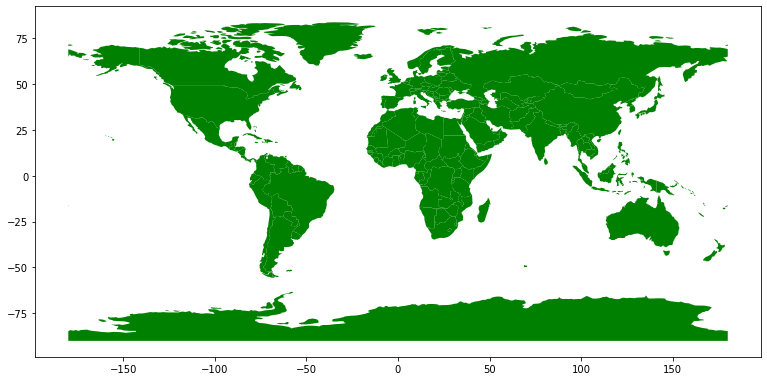

In [4]:
fig, ax = plt.subplots(figsize=(13,13))
world.plot(ax=ax, color='green', markersize=5);

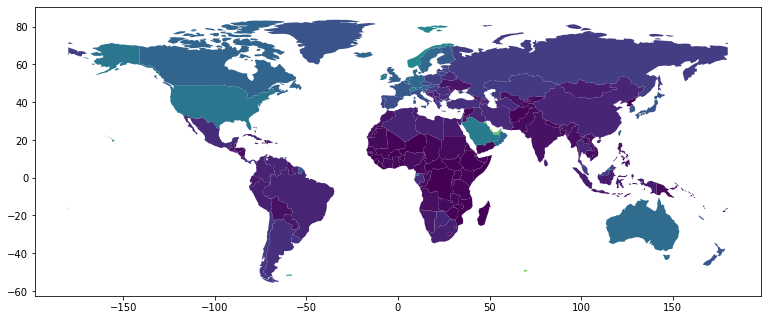

In [5]:
fig, ax = plt.subplots(figsize=(13,13))
world = world[(world.pop_est>0) & (world.name!="Antarctica")]
world['gdp_per_cap'] = world.gdp_md_est / world.pop_est
world.plot(ax=ax, column='gdp_per_cap');

<AxesSubplot:>

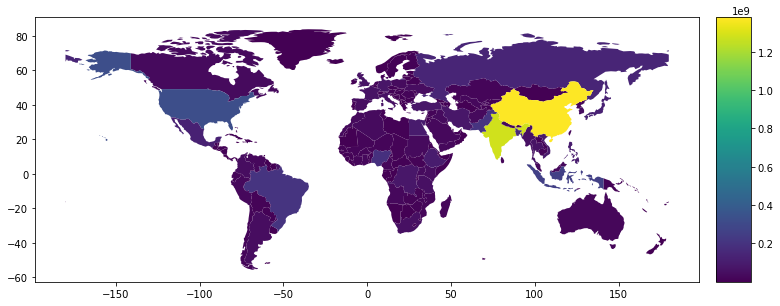

In [6]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
fig, ax = plt.subplots(figsize=(13,13))
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)
world.plot(column='pop_est', ax=ax, legend=True, cax=cax)

<AxesSubplot:>

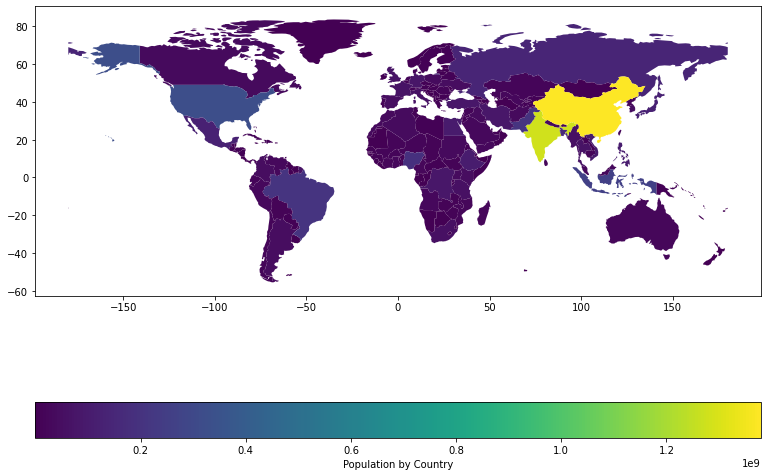

In [7]:
fig, ax = plt.subplots(figsize=(13,13))
world.plot(column='pop_est',
           ax=ax,
           legend=True,
           legend_kwds={'label': "Population by Country",
                        'orientation': "horizontal"})

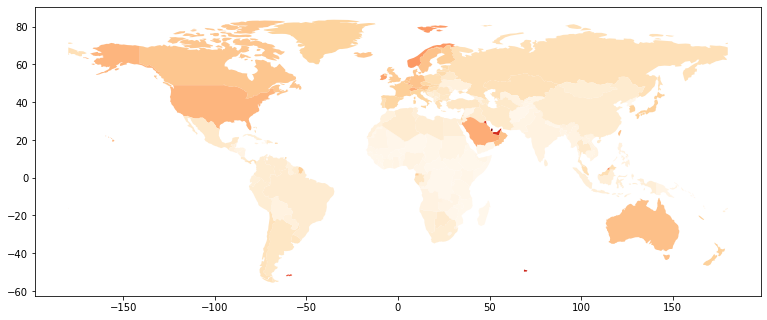

In [8]:
fig, ax = plt.subplots(figsize=(13,13))
world.plot(ax = ax, column='gdp_per_cap', cmap='OrRd');

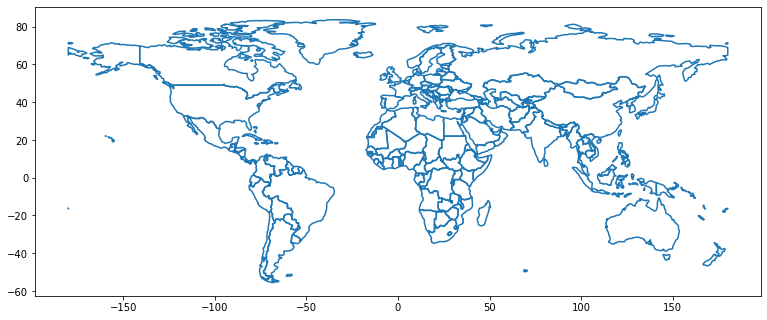

In [9]:
fig, ax = plt.subplots(figsize=(13,13))
world.boundary.plot(ax=ax);

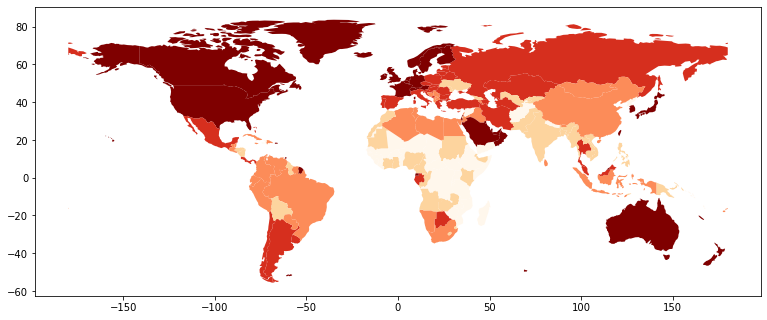

In [10]:
fig, ax = plt.subplots(figsize=(13,13))
world.plot(ax=ax, column='gdp_per_cap', cmap='OrRd', scheme='quantiles');

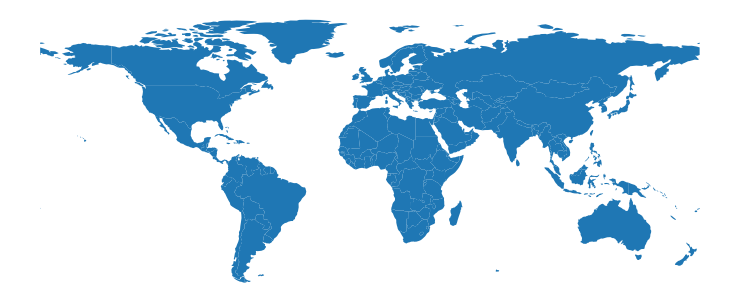

In [11]:
fig, ax = plt.subplots(figsize=(13,13))
ax = world.plot(ax=ax)
ax.set_axis_off();

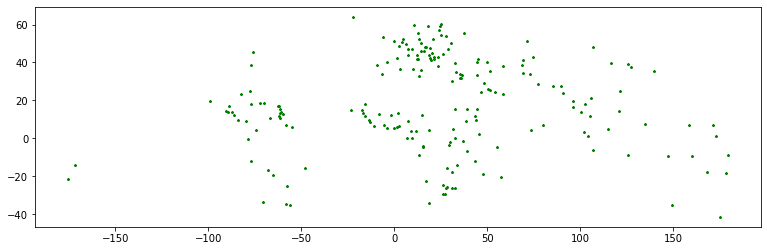

In [12]:
fig, ax = plt.subplots(figsize=(13,13))
cities.plot(ax=ax, marker='*', color='green', markersize=5);
cities = cities.to_crs(world.crs)

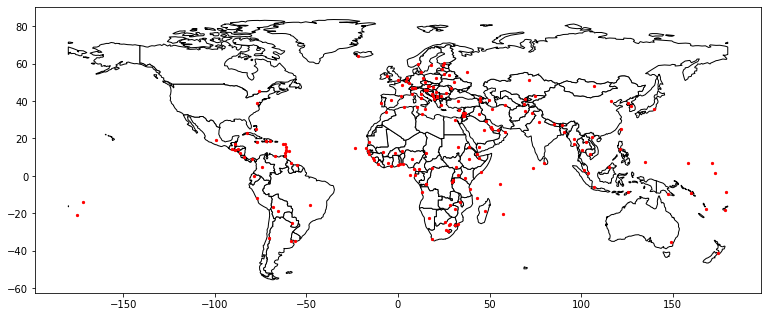

In [13]:
fig, ax = plt.subplots(figsize=(13,13))
ax.set_aspect('equal')
world.plot(ax=ax, color='white', edgecolor='black')
cities.plot(ax=ax, marker='o', color='red', markersize=5)
plt.show();

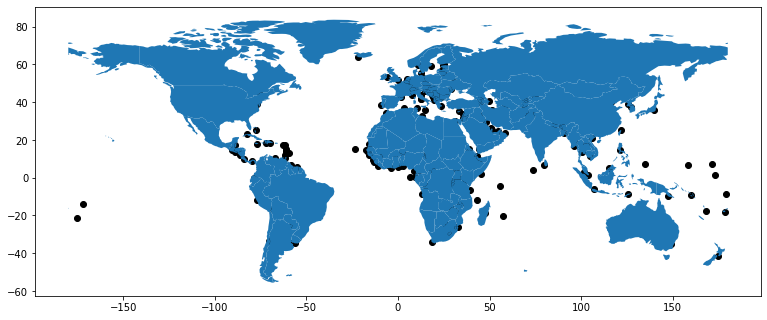

In [14]:
fig, ax = plt.subplots(figsize=(13,13))
ax = cities.plot(ax=ax, color='k')
world.plot(ax=ax);